## Warm up exercise

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# set seaborn graph options
sns.set_context('notebook')
sns.set_style('white')

# set numpy print options
np.set_printoptions(suppress=True)

A = np.identity(5)

print("Diagonal Matrix")
print(A)

Diagonal Matrix
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


## Plotting data

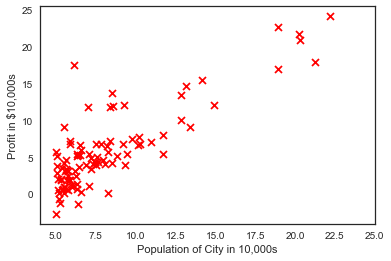

In [12]:
data = np.loadtxt("data/ex1data1.txt", delimiter = ",")
x = data[:, 0]
y = data[:, 1]
m = len(y)

plt.scatter(x, y, c = "r", marker = "x")
plt.xlim(4,25)
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of City in 10,000s")
plt.show()

## Linear regression with one variable

### Cost function

In [13]:
def computeCost(X, y, theta):
    m = len(y)
    
    pred = np.dot(X, theta)
    sqrErrors = (pred - y) ** 2
    
    return 1/(2 * m) * sum(sqrErrors)

### Gradient descent

Theta:  [-3.63029144  1.16636235]


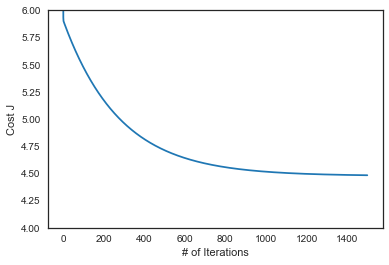

In [14]:
def gradientDescent(X, y, theta, alpha, numIterations):
    m = len(y)
    J_history = np.zeros(numIterations)
    
    for i in range(0, numIterations):
        pred = np.dot(X, theta)  # get predictions
        loss = pred - y  # calculate loss
        J_history[i] = computeCost(X, y, theta)  # calculate cost
        gradient = np.dot(X.transpose(), loss) / m  # calculate gradient
        theta = theta - (alpha * gradient)  # update theta
        
    return theta, J_history

X = np.column_stack((np.ones(m), data[:, 0]))
theta = np.zeros(2)

iterations = 1500  # number of iterations
alpha = 0.01  # learning rate

theta, cost_j = gradientDescent(X, y, theta, alpha, iterations)
print("Theta: ", theta)

plt.plot(cost_j)
plt.ylim(4,6)
plt.ylabel("Cost J")
plt.xlabel("# of Iterations")
plt.show()

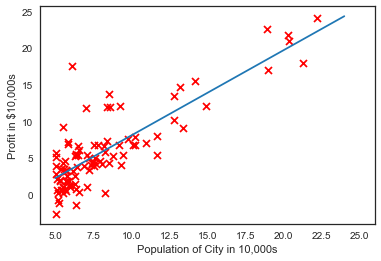

In [8]:
# Set up plot
plt.scatter(x, y, c = "r", marker = "x")
plt.xlim(4,26)
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of City in 10,000s")

# Plot linear regression function
x_vals = np.arange(5,25)
y_vals = theta[0] + (theta[1] * x_vals)
plt.plot(x_vals, y_vals, label = "Linear regression - gradient descent")

# Plot scikit-learn linear regression model for comparison
## TODO

## Linear regression with multiple variables

In [5]:
data_m = np.loadtxt("data/ex1data2.txt", delimiter = ",")
X = data_m[:, 0:2]
y = data_m[:, 2]
m = len(y)

### Feature normalization

In [6]:
def featureNormalize(X):
    X_norm = np.copy(X)
    mu = np.zeros(X_norm.shape[1])
    sigma = np.zeros(X_norm.shape[1])
    
    for i in range(0, X.shape[1]):
        mu[i] = X[:, i].mean()
        sigma[i] = X[:, i].std()
        X_norm[:, i] = (X[:, i] - mu[i]) / sigma[i]
        
    return X_norm, mu, sigma

### Gradient descent

Theta:  [ 340412.65957447  109447.79558639   -6578.3539709 ]


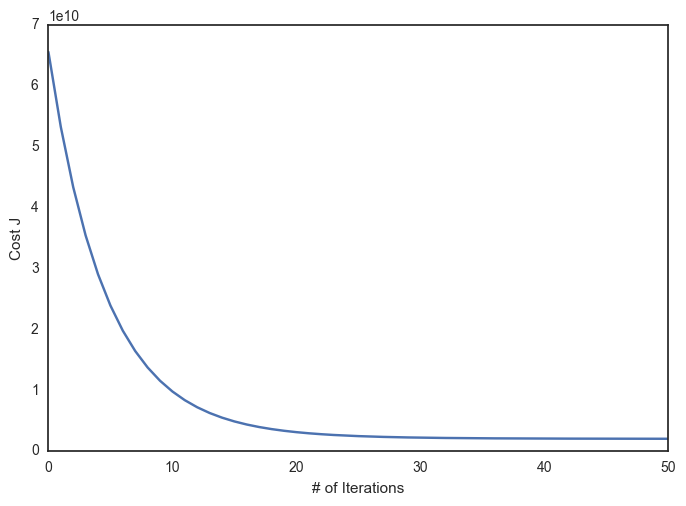

In [15]:
X_norm, mu, sigma = featureNormalize(X)
X_norm= np.column_stack((np.ones(m), X_norm[:, ]))

iterations = 400  # number of iterations
alpha = 0.1 # learning rate
theta = np.zeros(X_norm.shape[1])  # initial value of theta

theta, cost_j = gradientDescent(X_norm, y, theta, alpha, iterations)
print("Theta: ", theta)

plt.plot(cost_j)
plt.xlim(0, 50)
plt.ylabel("Cost J")
plt.xlabel("# of Iterations")
plt.show()

In [16]:
# Normalize x values
sqft = (1650 - mu[0])/ sigma[0]
rooms = (3 - mu[1])/ sigma[1]
price = theta[0] + (theta[1] * sqft) + (theta[2] * rooms)

print("Predicted value of a 1650 square foot house with 3 bedrooms:\n")
print("${:,.2f}".format(price))

Predicted value of a 1650 square foot house with 3 bedrooms:

$293,081.46


### Normal equations

In [17]:
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    A = X.T.dot(X)
    A_inv = np.linalg.inv(A)
    theta = A_inv.dot(X.T.dot(y))
    
    return theta

In [18]:
X_new = np.column_stack((np.ones(m), X[:, ]))
theta = normalEqn(X_new, y)

# x values do not need to be normalized for normal equation
sqft = 1650
rooms = 3
price = theta[0] + (theta[1] * sqft) + (theta[2] * rooms)

print("Predicted value of a 1650 square foot house with 3 bedrooms:\n")
print("${:,.2f}".format(price))

Predicted value of a 1650 square foot house with 3 bedrooms:

$293,081.46
